In [29]:
from datetime import timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
aus_population = pd.read_csv('fpppy_data\data\global_economy.csv').query('`Code` == "AUS"').filter(['ds', 'Population']).rename({'Population': 'y'}, axis=1).reset_index(drop=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shivk\AppData\Local\Temp\ipykernel_12816\3322244893.py:1: SyntaxWarning: invalid escape sequence '\d'
  aus_population = pd.read_csv('fpppy_data\data\global_economy.csv').query('`Code` == "AUS"').filter(['ds', 'Population']).rename({'Population': 'y'}, axis=1).reset_index(drop=True)


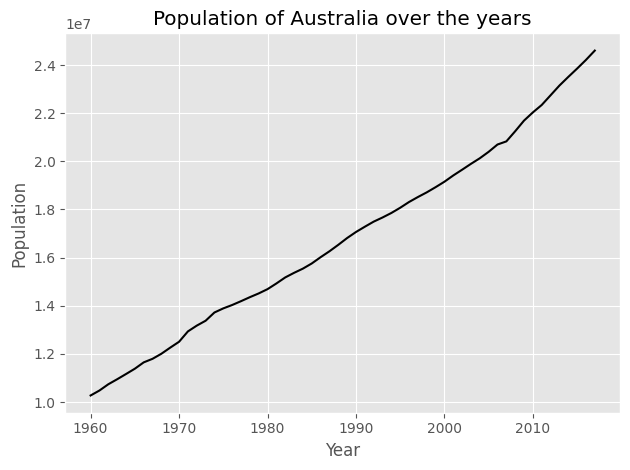

In [4]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_population['ds'], aus_population['y'], c='k')
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population of Australia over the years")

plt.tight_layout()
plt.show()

In [30]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT+h*((yT-y1)/(T-1))

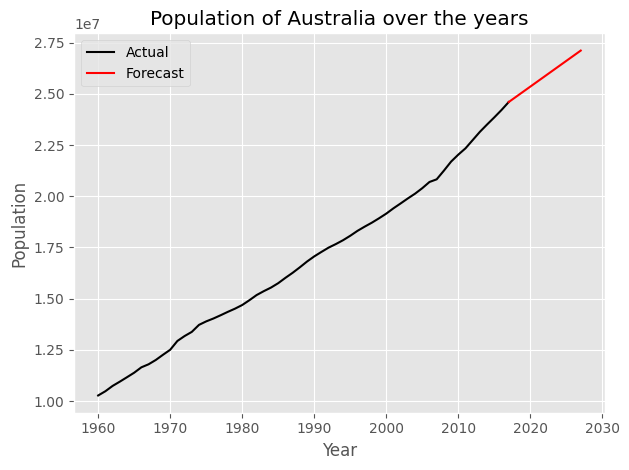

In [6]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_population['ds'], aus_population['y'], c='k', label='Actual')
ax.plot(range(aus_population['ds'].max(), aus_population['ds'].max()+11), [random_walk_with_drift(aus_population['y'].values, i) for i in range(0, 11)], c='r', label='Forecast')

ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.legend()
ax.set_title("Population of Australia over the years")

plt.tight_layout()
plt.show()

In [7]:
aus_bricks_prod = pd.read_csv(r'fpppy_data\data\aus_production.csv').filter(['ds', 'Bricks']).rename({'Bricks': 'y'}, axis=1).dropna(axis=0)

In [8]:
aus_bricks_prod.head()

,ds,y
0,1956-01-01,189.0
1,1956-04-01,204.0
2,1956-07-01,208.0
3,1956-10-01,197.0
4,1957-01-01,187.0


In [40]:
aus_bricks_prod['ds'] = pd.to_datetime(aus_bricks_prod['ds'])

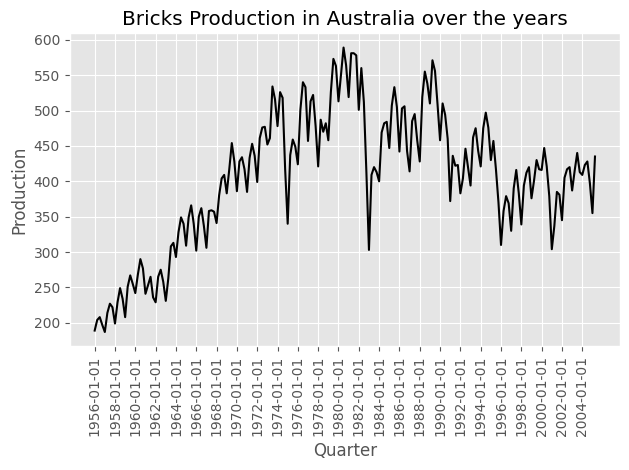

In [9]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod['ds'], aus_bricks_prod['y'], c='k')
ax.set_xticks(aus_bricks_prod['ds'][::8], aus_bricks_prod['ds'][::8], rotation=90)
ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.set_title("Bricks Production in Australia over the years")

plt.tight_layout()
plt.show()

In [10]:
def seasonal_naive(y, h, m):
    k = int((h-1)/m)
    yT = y[-1]
    return yT+h-m*(k+1)

In [49]:
from datetime import timedelta
pred_qtr = [aus_bricks_prod['ds'].max()]
pred_val = [aus_bricks_prod['y'].values[-1]]
for h in range(40):
    pred_qtr.append(pred_qtr[-1] + pd.tseries.offsets.QuarterEnd() + timedelta(days=1))
    pred_val.append(seasonal_naive(aus_bricks_prod['y'].values, h, 4))

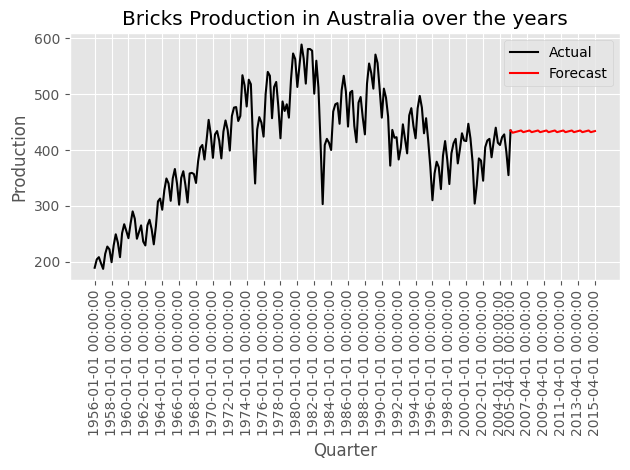

In [77]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod['ds'], aus_bricks_prod['y'], c='k', label='Actual')
ax.plot(pred_qtr, pred_val, c='r', label='Forecast')

ax.set_xticks(list(aus_bricks_prod['ds'][::8])+pred_qtr[::8], list(aus_bricks_prod['ds'][::8])+pred_qtr[::8], rotation=90)
ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.legend()
ax.set_title("Bricks Production in Australia over the years")

plt.tight_layout()
plt.show()

In [74]:
aus_livestock = pd.read_csv('fpppy_data/data/aus_livestock.csv')
nsw_lambs = aus_livestock.query('`unique_id` == "New South Wales_Lambs"').filter(['ds', 'y'])
nsw_lambs['ds'] = pd.to_datetime(nsw_lambs['ds'], format="%Y-%m-%d")
nsw_lambs.head()

,ds,y
17088,1972-07-01,587600.0
17089,1972-08-01,553700.0
17090,1972-09-01,494900.0
17091,1972-10-01,533500.0
17092,1972-11-01,574300.0


In [84]:
nsw_lambs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 17088 to 17645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      558 non-null    datetime64[ns]
 1   y       558 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


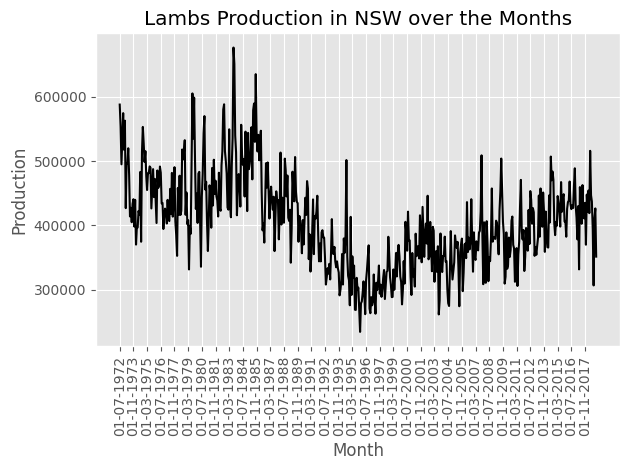

In [103]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nsw_lambs['ds'], nsw_lambs['y'], c='k')
ax.set_xticks(nsw_lambs['ds'][::16], nsw_lambs['ds'][::16].dt.strftime('%d-%m-%Y'), rotation=90)
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.set_title("Lambs Production in NSW over the Months")

plt.tight_layout()
plt.show()

In [78]:
def naive(y):
    return y[-1]

In [100]:
from datetime import timedelta
pred_per = [nsw_lambs['ds'].max()]
pred_val = [nsw_lambs['y'].values[-1]]
for _ in range(40):
    pred_per.append((pred_per[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1)))
    pred_val.append(naive(nsw_lambs['y'].values))

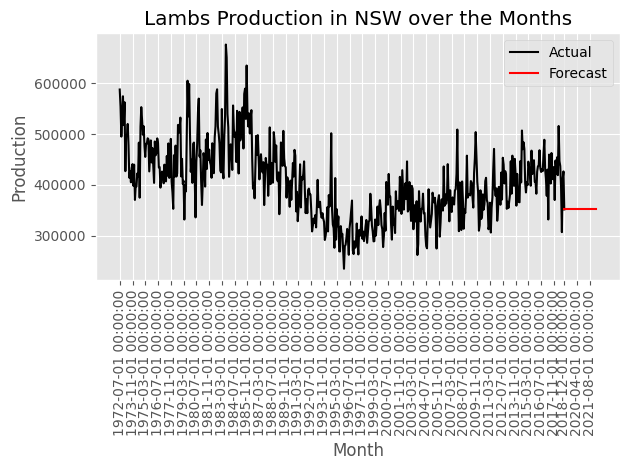

In [104]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nsw_lambs['ds'], nsw_lambs['y'], c='k', label='Actual')
ax.plot(pred_per, pred_val, c='r', label='Forecast')

ax.set_xticks(list(nsw_lambs['ds'][::16])+pred_per[::16], list(nsw_lambs['ds'][::16])+pred_per[::16], rotation=90)
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.legend()
ax.set_title("Lambs Production in NSW over the Months")

plt.tight_layout()
plt.show()

In [7]:
aus_retail = pd.read_csv('fpppy_data/data/aus_retail.csv')
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6


In [23]:
aus_takeaway = aus_retail.query('`Industry` == "Takeaway food services"').filter(['Month', 'Turnover']).rename({'Month': 'ds', 'Turnover': 'y'}, axis=1)
aus_takeaway['ds'] = pd.to_datetime(aus_takeaway['ds'])
aus_takeaway = aus_takeaway.sort_values(['ds'], axis=0).reset_index(drop=True)
aus_takeaway = aus_takeaway.groupby(['ds'], as_index=False)['y'].sum()
aus_takeaway.head()

,ds,y
0,1982-04-01,193.7
1,1982-05-01,193.9
2,1982-06-01,186.3
3,1982-07-01,189.5
4,1982-08-01,190.5


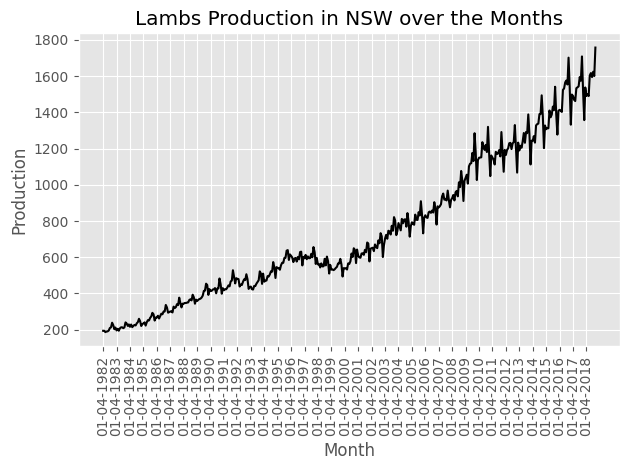

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_takeaway['ds'], aus_takeaway['y'], c='k')
ax.set_xticks(aus_takeaway['ds'][::12], aus_takeaway['ds'][::12].dt.strftime('%d-%m-%Y'), rotation=90)
ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.set_title("Australian takeaway food turnover over the years")

plt.tight_layout()
plt.show()

In [32]:
pred_ds = [aus_takeaway['ds'].values[-1]]
pred_y = [aus_takeaway['y'].values[-1]]

for h in range(24):
    pred_ds.append(pred_ds[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1))
    pred_y.append(random_walk_with_drift(aus_takeaway['y'].values, h))

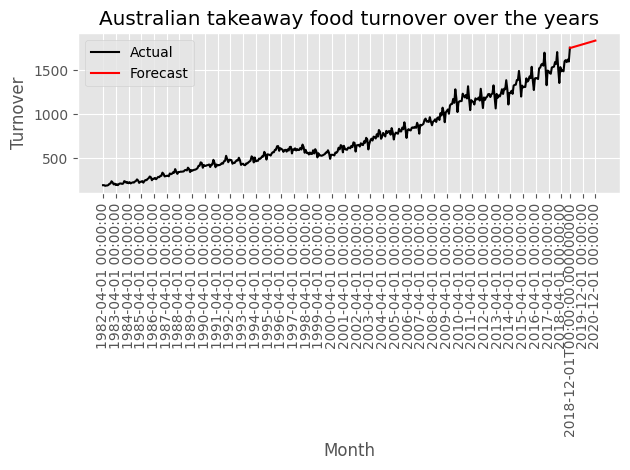

In [34]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_takeaway['ds'], aus_takeaway['y'], c='k', label='Actual')
ax.plot(pred_ds, pred_y, c='r', label='Forecast')

ax.set_xticks(list(aus_takeaway['ds'][::12])+pred_ds[::12], list(aus_takeaway['ds'][::12])+pred_ds[::12], rotation=90)
ax.set_xlabel("Month")
ax.set_ylabel("Turnover")
ax.legend()
ax.set_title("Australian takeaway food turnover over the years")

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
gafa_stock = pd.read_csv('fpppy_data/data/gafa_stock.csv')
gafa_stock.head()

,unique_id,ds,y
0,AAPL_Open,2014-01-02,79.382858
1,AAPL_Open,2014-01-03,78.980003
2,AAPL_Open,2014-01-06,76.778572
3,AAPL_Open,2014-01-07,77.760002
4,AAPL_Open,2014-01-08,76.972855


In [4]:
fb_close = gafa_stock.query('`unique_id` == "FB_Close"').filter(['ds', 'y'])
fb_close['ds'] = range(fb_close.shape[0])
fb_close = fb_close.reset_index(drop=True)
fb_close.head()

,ds,y
0,0,54.709999
1,1,54.560001
2,2,57.200001
3,3,57.919998
4,4,58.230000


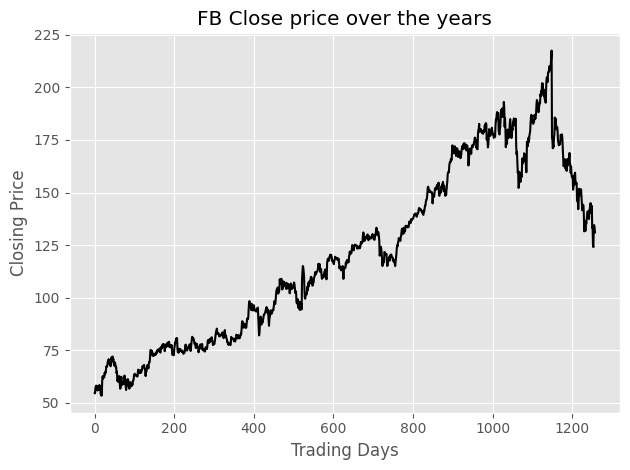

In [5]:
fig = plt.figure()
ax = fig.gca()

ax.plot(fb_close['ds'], fb_close['y'], c='k')
ax.set_xlabel('Trading Days')
ax.set_ylabel('Closing Price')
ax.set_title('FB Close price over the years')

plt.tight_layout()
plt.show()

In [6]:
def mean(y):
    return np.mean(y)

In [7]:
def naive(y):
    yT = y[-1]
    return yT

In [8]:
def seasonal_naive(y, h, m):
    k = int((h-1)/m)
    yT = y[-1]
    return yT+h-m*(k+1)

In [9]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT+h*((yT-y1)/(T-1))

In [10]:
pred_ds = [fb_close['ds'].values[-1]]
pred_mean = [fb_close['y'].values[-1]]
pred_naive = [fb_close['y'].values[-1]]
pred_snaive = [fb_close['y'].values[-1]]
pred_rwwd = [fb_close['y'].values[-1]]

for h in range(200):
    pred_ds.append(pred_ds[-1]+1)
    pred_mean.append(mean(fb_close['y'].values))
    pred_naive.append(naive(fb_close['y'].values))
    pred_snaive.append(seasonal_naive(fb_close['y'].values, h, 100))
    pred_rwwd.append(random_walk_with_drift(fb_close['y'].values, h))

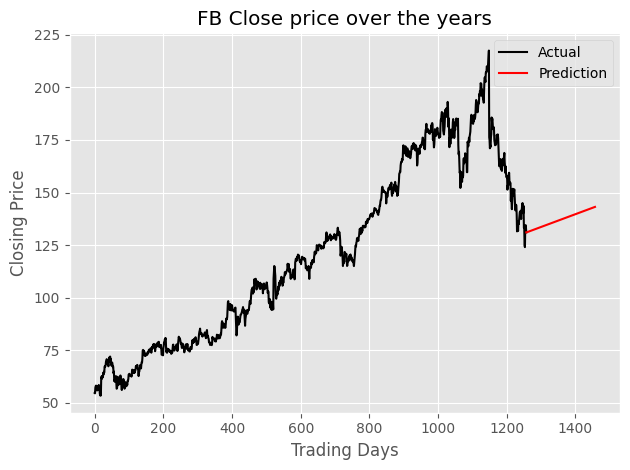

In [11]:
fig = plt.figure()
ax = fig.gca()

ax.plot(fb_close['ds'], fb_close['y'], c='k', label='Actual')
ax.plot(pred_ds, pred_rwwd, c='r', label='Prediction')

ax.set_xlabel('Trading Days')
ax.set_ylabel('Closing Price')
ax.set_title('FB Close price over the years')
ax.legend()

plt.tight_layout()
plt.show()

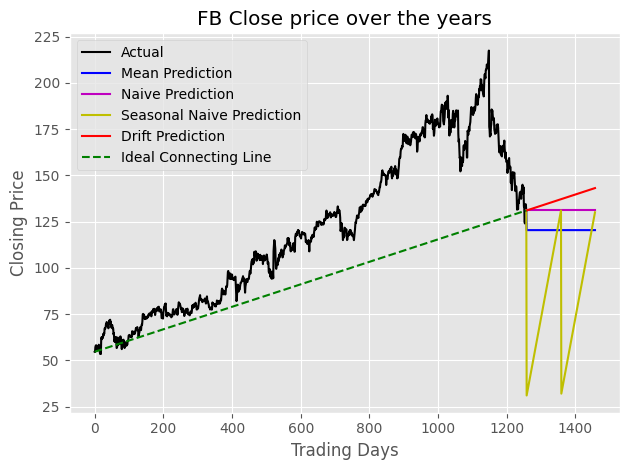

In [12]:
fig = plt.figure()
ax = fig.gca()

ax.plot(fb_close['ds'], fb_close['y'], c='k', label='Actual')
ax.plot(pred_ds, pred_mean, c='b', label='Mean Prediction')
ax.plot(pred_ds, pred_naive, c='m', label='Naive Prediction')
ax.plot(pred_ds, pred_snaive, c='y', label='Seasonal Naive Prediction')
ax.plot(pred_ds, pred_rwwd, c='r', label='Drift Prediction')
ax.plot([fb_close['ds'].values[0], fb_close['ds'].values[-1]], [fb_close['y'].values[0], fb_close['y'].values[-1]], c='g', ls='--', label='Ideal Connecting Line')

ax.set_xlabel('Trading Days')
ax.set_ylabel('Closing Price')
ax.set_title('FB Close price over the years')
ax.legend()

plt.tight_layout()
plt.show()

According to me, naive prediction is the best one.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
plt.style.use("ggplot")

In [3]:
aus_production = pd.read_csv("fpppy_data/data/aus_production.csv")
aus_production["ds"] = pd.to_datetime(aus_production["ds"])

In [4]:
aus_production.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


In [5]:
recent_production = aus_production.query("ds.dt.year >= 1992").filter(["ds", "Beer"])
recent_production.head()

,ds,Beer
144,1992-01-01,443
145,1992-04-01,410
146,1992-07-01,420
147,1992-10-01,532
148,1993-01-01,433


In [6]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

In [7]:
recent_production["pred"] = [
    seasonal_naive(recent_production["Beer"].values, h, 4)
    for h in range(recent_production.shape[0])
]

In [8]:
recent_production["resid"] = recent_production["Beer"] - recent_production["pred"]
recent_production.head()

,ds,Beer,pred,resid
144,1992-01-01,443,370,73
145,1992-04-01,410,371,39
146,1992-07-01,420,372,48
147,1992-10-01,532,373,159
148,1993-01-01,433,374,59


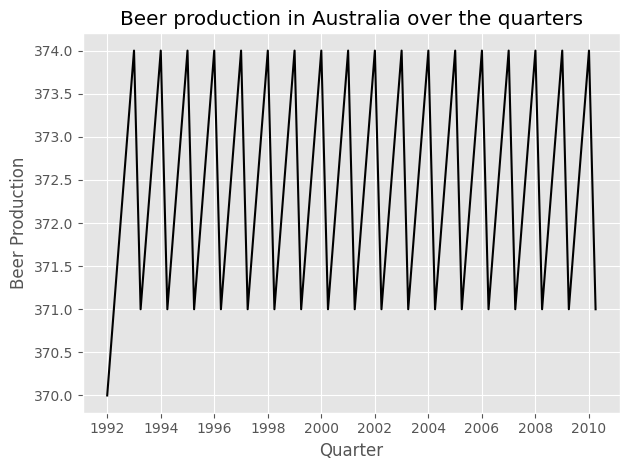

In [9]:
fig = plt.figure()
ax = fig.gca()

ax.plot(
    recent_production["ds"], recent_production["pred"], c="k", label="Fitted Values"
)
ax.set_xlabel("Quarter")
ax.set_ylabel("Beer Production")
ax.set_title("Beer production in Australia over the quarters")

plt.tight_layout()
plt.show()

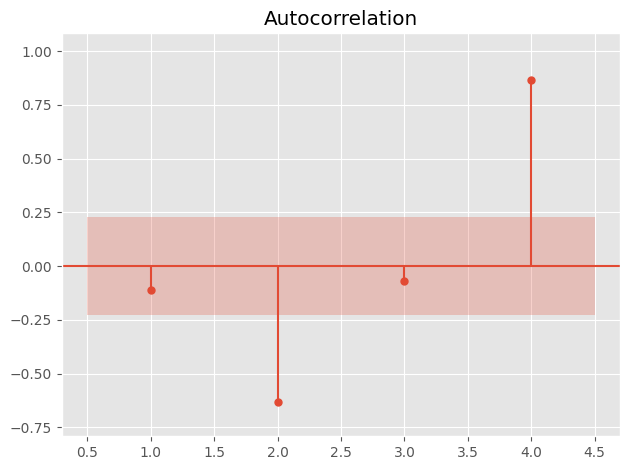

In [12]:
fig = plt.figure()
ax = fig.gca()

plot_acf(
    recent_production["resid"],
    ax=ax,
    lags=4,
    zero=False,
    auto_ylims=True,
    bartlett_confint=False,
)

plt.tight_layout()
plt.show()

In [43]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
global_economy = pd.read_csv("fpppy_data/data/global_economy.csv")
global_economy.head()

,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [41]:
aus_export = (
    global_economy.query("`Code` == 'AUS'")
    .filter(["ds", "Exports"])
    .rename({"Exports": "y"}, axis=1)
)
aus_export["ds"] = pd.to_datetime(aus_export["ds"], format="%Y")
aus_export = aus_export.sort_values(by=["ds"]).reset_index(drop=True)
aus_export.head()

,ds,y
0,1960-01-01,12.994452
1,1961-01-01,12.403101
2,1962-01-01,13.943012
3,1963-01-01,13.005886
4,1964-01-01,14.938248


In [34]:
aus_production = pd.read_csv("fpppy_data/data/aus_production.csv")
aus_production.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


In [35]:
aus_beer_production = aus_production.filter(["ds", "Beer"]).rename({"Beer": "y"}, axis=1)
aus_beer_production["ds"] = pd.to_datetime(aus_beer_production["ds"], format="%Y-%m-%d")
aus_beer_production = aus_beer_production.sort_values(by=["ds"]).reset_index(drop=True)
aus_beer_production.head()

,ds,y
0,1956-01-01,284
1,1956-04-01,213
2,1956-07-01,227
3,1956-10-01,308
4,1957-01-01,262


In [28]:
def naive(y):
    yT = y[-1]
    return yT

In [29]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

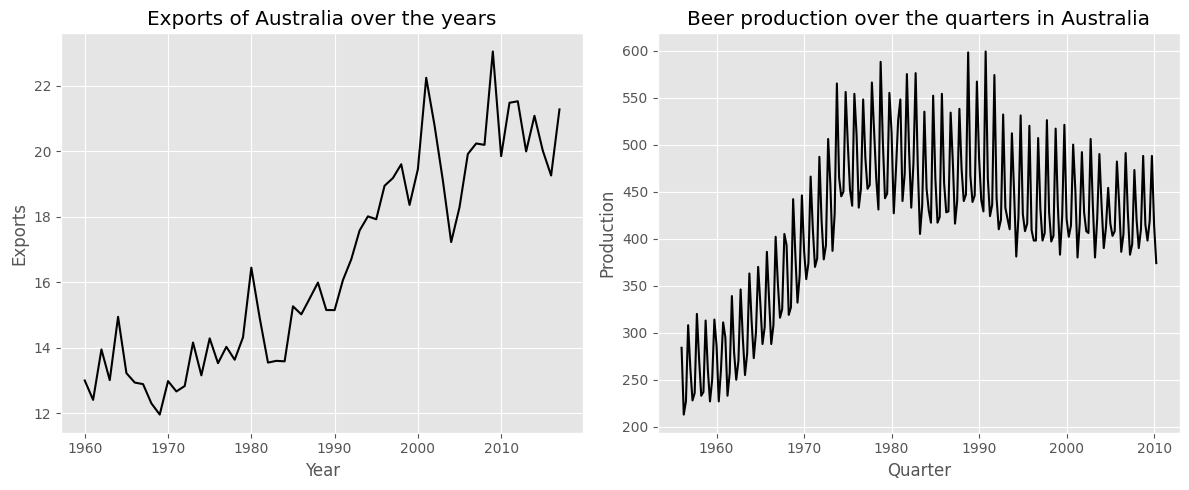

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(aus_export["ds"], aus_export["y"], c="k")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Exports")
axes[0].set_title("Exports of Australia over the years")

axes[1].plot(aus_beer_production["ds"], aus_beer_production["y"], c="k")
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Production")
axes[1].set_title("Beer production over the quarters in Australia")

plt.tight_layout()
plt.show()

In [49]:
aus_export_pred_ds = [aus_export["ds"].values[-1]]
aus_export_pred_y = [aus_export["y"].values[-1]]
aus_beer_production_pred_ds = [aus_beer_production["ds"].values[-1]]
aus_beer_production_pred_y = [aus_beer_production["y"].values[-1]]

for h in range(12):
    aus_export_pred_ds.append(
        aus_export_pred_ds[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1)
    )
    aus_export_pred_y.append(naive(aus_export["y"].values))
    aus_beer_production_pred_ds.append(
        aus_beer_production_pred_ds[-1]
        + pd.tseries.offsets.QuarterEnd()
        + timedelta(days=1)
    )
    aus_beer_production_pred_y.append(
        seasonal_naive(aus_beer_production["y"].values, h, 4)
    )

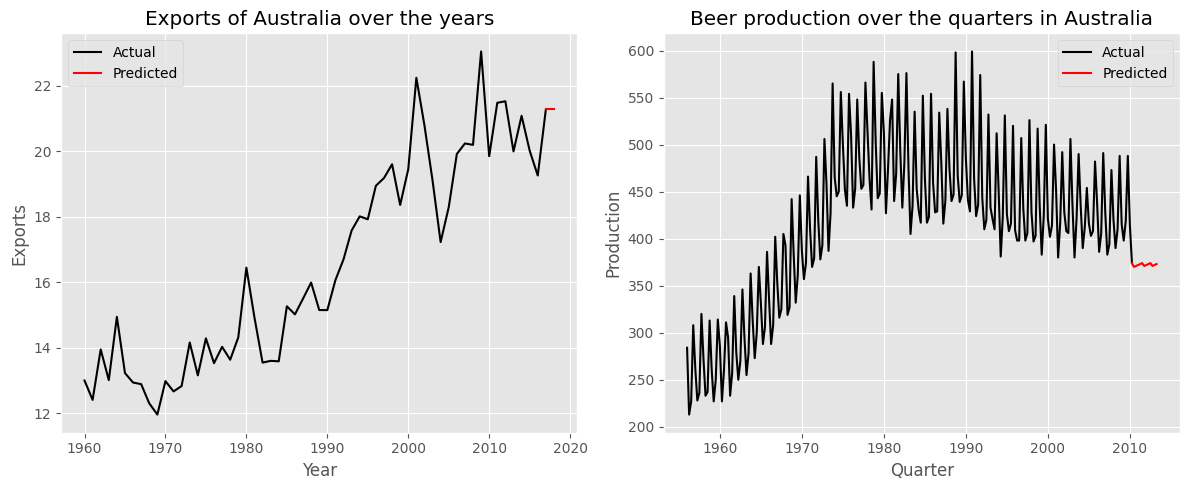

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(aus_export["ds"], aus_export["y"], c="k", label="Actual")
axes[0].plot(aus_export_pred_ds, aus_export_pred_y, c="r", label="Predicted")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Exports")
axes[0].set_title("Exports of Australia over the years")
axes[0].legend()

axes[1].plot(aus_beer_production["ds"], aus_beer_production["y"], c="k", label="Actual")
axes[1].plot(
    aus_beer_production_pred_ds, aus_beer_production_pred_y, c="r", label="Predicted"
)
axes[1].set_xlabel("Quarter")
axes[1].set_ylabel("Production")
axes[1].set_title("Beer production over the quarters in Australia")
axes[1].legend()

plt.tight_layout()
plt.show()

In [29]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
plt.style.use("ggplot")

In [12]:
aus_livestock = pd.read_csv("fpppy_data/data/aus_livestock.csv")

In [25]:
vic_livestock = aus_livestock.query(
    "`unique_id`.str.startswith('Victoria')", engine="python"
)
vic_livestock["ds"] = pd.to_datetime(vic_livestock["ds"])

vic_livestock.head()

C:\Users\70082692\AppData\Local\Temp\ipykernel_36012\2975470552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vic_livestock["ds"] = pd.to_datetime(vic_livestock["ds"])


,unique_id,ds,y
3036,"Victoria_Bulls, bullocks and steers",1976-07-01,109200.0
3037,"Victoria_Bulls, bullocks and steers",1976-08-01,94700.0
3038,"Victoria_Bulls, bullocks and steers",1976-09-01,95500.0
3039,"Victoria_Bulls, bullocks and steers",1976-10-01,94800.0
3040,"Victoria_Bulls, bullocks and steers",1976-11-01,94100.0


In [26]:
unique_id = vic_livestock["unique_id"].unique()
unique_id

array(['Victoria_Bulls, bullocks and steers', 'Victoria_Calves',
       'Victoria_Cattle (excl. calves)', 'Victoria_Cows and heifers',
       'Victoria_Lambs', 'Victoria_Pigs', 'Victoria_Sheep'], dtype=object)

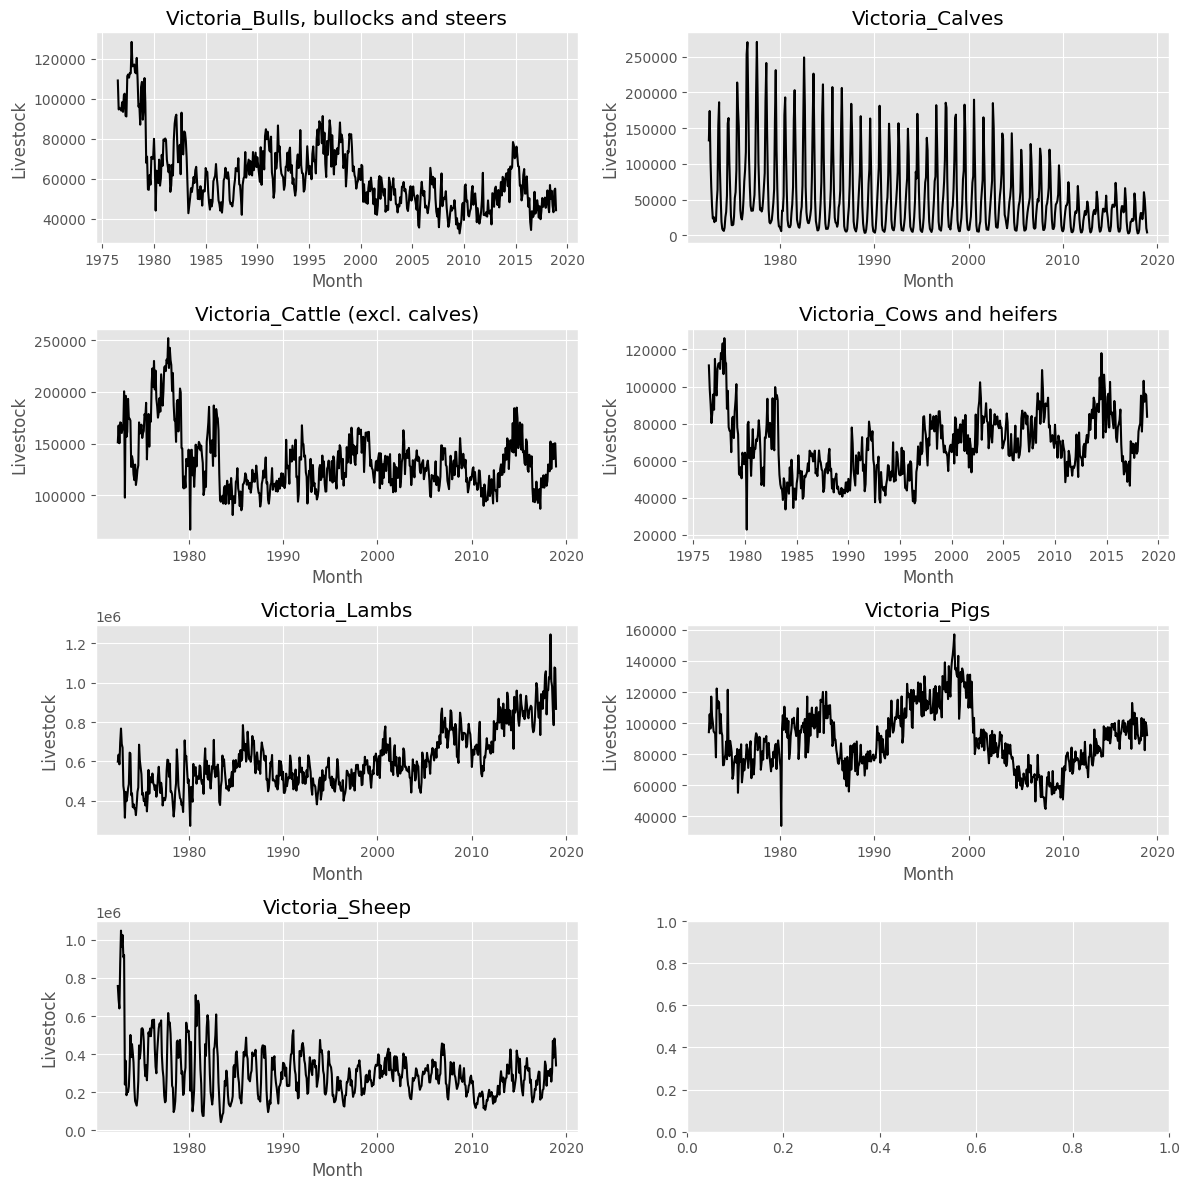

In [27]:
a = np.arange(unique_id.shape[0] + 1)
shape = np.reshape(a, (-1, 2)).shape
indices = np.unravel_index(a, shape)
indices = list(zip(indices[0], indices[1]))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 12))

for i, uid in enumerate(unique_id):
    df = (
        vic_livestock.query(f"`unique_id` == '{uid}'")
        .filter(["ds", "y"])
        .reset_index(drop=True)
    )
    axes[indices[i]].plot(df["ds"], df["y"], c="k")
    axes[indices[i]].set_xlabel("Month")
    axes[indices[i]].set_ylabel("Livestock")
    axes[indices[i]].set_title(uid)

plt.tight_layout()
plt.show()

In [33]:
def seasonal_naive(y, h, m):
    k = int((h - 1) / m)
    yT = y[-1]
    return yT + h - m * (k + 1)

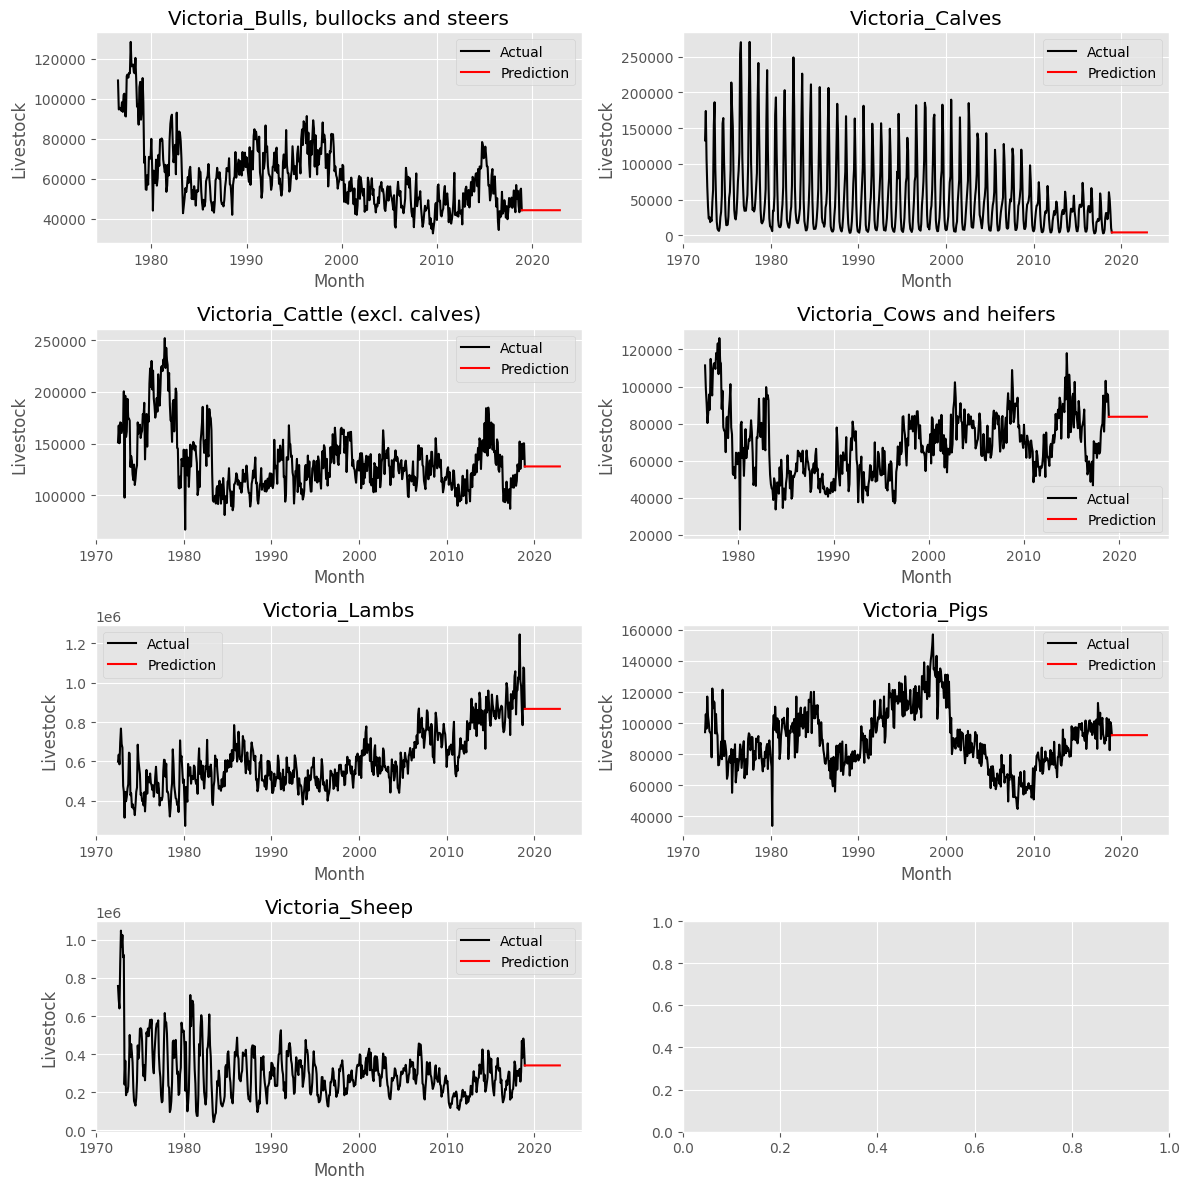

In [ ]:
a = np.arange(unique_id.shape[0] + 1)
shape = np.reshape(a, (-1, 2)).shape
indices = np.unravel_index(a, shape)
indices = list(zip(indices[0], indices[1]))

fig, axes = plt.subplots(nrows=shape[0], ncols=shape[1], figsize=(12, 12))

for i, uid in enumerate(unique_id):
    df = (
        vic_livestock.query(f"`unique_id` == '{uid}'")
        .filter(["ds", "y"])
        .reset_index(drop=True)
    )
    pred_ds = [df["ds"].values[-1]]
    pred_y = [df["y"].values[-1]]

    for h in range(48):
        pred_ds.append(pred_ds[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1))
        pred_y.append(seasonal_naive(df["y"].values, h, 12))

    axes[indices[i]].plot(df["ds"], df["y"], c="k", label="Actual")
    axes[indices[i]].plot(pred_ds, pred_y, c="r", label="Prediction")

    axes[indices[i]].set_xlabel("Month")
    axes[indices[i]].set_ylabel("Livestock")
    axes[indices[i]].set_title(uid)
    axes[indices[i]].legend()

plt.tight_layout()
plt.show()